# Zadatak 1

U prilogu vježbe nalazi se skripta 7.1. koja učitava MNIST skup podataka. Dopunite skriptu na odgovarajućim mjestima: 
1) Prikažite nekoliko slika iz skupa podataka (npr. pomoću matplotlib biblioteke).
2) Izgradite i trenirajte model potpuno povezane neuronske mreže pomoću Keras API. 
    https://keras.io/guides/sequential_model/
3) Izračunajte točnost izgrađene mreže na skupu podataka za učenje i skupu podataka za testiranje.
4) Prikažite matricu zabune na skupu podataka za učenje i na skupu podataka za testiranje. Komentirajte dobivene rezultate.
5) Spremite model na disk.
    https://keras.io/guides/serialization_and_saving/
6) Ponovite korake 2) do 5), ali izgradite i naučite konvolucijsku neuronsku mrežu. Usporedite rezultate koje ste dobili s potpuno povezanom mrežom s rezultatima koje postiže konvolucijska neuronska mreža na testnom skupu.

In [113]:
import numpy as np
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


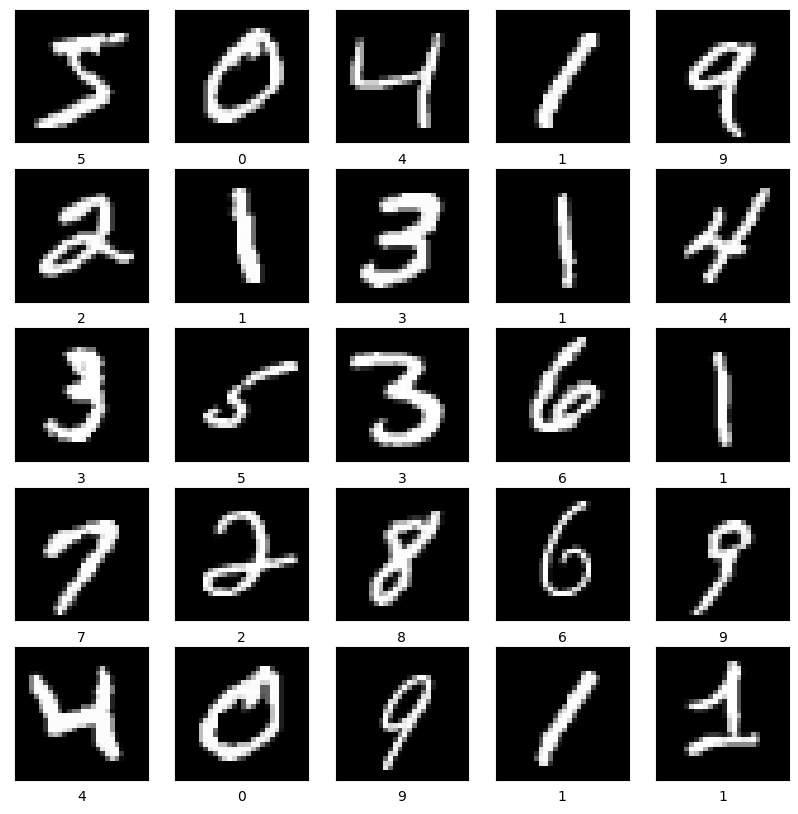

In [114]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# train i test podaci
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# prikaz karakteristika train i test podataka
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# TODO: prikazi nekoliko slika iz train skupa

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [115]:
# skaliranje slike na raspon [0,1]
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

# slike trebaju biti (28, 28, 1)
x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")


# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [116]:
# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),

    ]
)

In [117]:
# TODO: definiraj karakteristike procesa ucenja pomocu .compile()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [118]:
# TODO: provedi ucenje mreze

print(y_train_s.shape)
print(x_train_s.shape)

model.fit(x_train_s, y_train_s, epochs=5, batch_size=32)

(60000, 10)
(60000, 28, 28, 1)
Epoch 1/5
1875/1875 [==============================] - 56s 29ms/step - loss: 0.2060 - accuracy: 0.9366
Epoch 2/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0769 - accuracy: 0.9759
Epoch 3/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0596 - accuracy: 0.9815
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0532 - accuracy: 0.9836
Epoch 5/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0455 - accuracy: 0.9856


In [122]:
# TODO: Prikazi test accuracy i matricu zabune

model.summary()

loss_and_metrics = model.evaluate(x_test_s, y_test_s, batch_size=128)
print("Model accuracy: ", loss_and_metrics)

Y_predict = model.predict(x_test_s)
Y_predict = np.argmax(Y_predict, 1)
Y_test = np.argmax(y_test_s, 1)
mtx = confusion_matrix(Y_test, Y_predict)
print(mtx)


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)            

In [124]:
# TODO: spremi model

model.save('model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets
